# Importing Essential Libraries for Preprocessing

In [17]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from skopt.space import Real, Integer, Categorical
from skopt import gp_minimize

import shap
shap.initjs()

# Extracting imputed database

In [2]:
db = pd.read_csv("TiAl_prep-db_YS-ET_TS-final_El_imp-3.csv")
db = db.iloc[:,1:]
db

,Ti,Al,Mn,Nb,Cr,Mo,V,Zr,Hf,O,...,Ru,Ni,Y,Re,TestT,logYS,logTS,logEl,logHV,logCost
0,53.000,47.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,...,0.0,0,0.0,0.0,298,3.060000,2.82,0.14,2.487138,0.582839
1,52.986,47.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,...,0.0,0,0.0,0.0,298,3.040000,2.81,0.14,2.472756,0.593444
2,52.486,47.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,...,0.0,0,0.0,0.0,298,2.820000,2.74,-0.14,2.519828,0.657259
3,52.986,47.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,...,0.0,0,0.0,0.0,298,3.040000,2.81,0.14,2.484300,0.593444
4,52.986,47.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,...,0.0,0,0.0,0.0,298,3.040000,2.81,0.14,2.510545,0.593444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1932,60.600,39.4,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,...,0.0,0,0.0,0.0,298,2.412133,2.53,-0.21,NaN,0.603887
1933,60.600,39.4,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,...,0.0,0,0.0,0.0,298,2.412098,2.53,-0.21,NaN,0.603887
1934,60.600,39.4,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,...,0.0,0,0.0,0.0,298,2.412063,2.53,-0.21,NaN,0.603887
1935,60.600,39.4,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,...,0.0,0,0.0,0.0,298,2.412028,2.53,-0.21,NaN,0.603887


In [3]:
db = pd.concat([db.iloc[:,:-2],db.iloc[:,-1]],axis=1)
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1937 entries, 0 to 1936
Data columns (total 25 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ti       1937 non-null   float64
 1   Al       1937 non-null   float64
 2   Mn       1937 non-null   float64
 3   Nb       1937 non-null   float64
 4   Cr       1937 non-null   float64
 5   Mo       1937 non-null   float64
 6   V        1937 non-null   float64
 7   Zr       1937 non-null   float64
 8   Hf       1937 non-null   int64  
 9   O        1937 non-null   float64
 10  Ta       1937 non-null   float64
 11  Si       1937 non-null   float64
 12  W        1937 non-null   float64
 13  C        1937 non-null   float64
 14  B        1937 non-null   float64
 15  Fe       1937 non-null   float64
 16  Ru       1937 non-null   float64
 17  Ni       1937 non-null   int64  
 18  Y        1937 non-null   float64
 19  Re       1937 non-null   float64
 20  TestT    1937 non-null   int64  
 21  logYS    1937 

#### Extracting input columns and all the desired properties

In [4]:
X = db.iloc[:,:-4]
X.head()

,Ti,Al,Mn,Nb,Cr,Mo,V,Zr,Hf,O,...,Si,W,C,B,Fe,Ru,Ni,Y,Re,TestT
0,53.000,47.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,...,0.0,0.0,0.0,0.000,0.0,0.0,0,0.0,0.0,298
1,52.986,47.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,...,0.0,0.0,0.0,0.014,0.0,0.0,0,0.0,0.0,298
2,52.486,47.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,...,0.0,0.5,0.0,0.014,0.0,0.0,0,0.0,0.0,298
3,52.986,47.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,...,0.0,0.0,0.0,0.014,0.0,0.0,0,0.0,0.0,298
4,52.986,47.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,...,0.0,0.0,0.0,0.014,0.0,0.0,0,0.0,0.0,298


In [5]:
y = db.iloc[:,-4:]
y.head()

,logYS,logTS,logEl,logCost
0,3.06,2.82,0.14,0.582839
1,3.04,2.81,0.14,0.593444
2,2.82,2.74,-0.14,0.657259
3,3.04,2.81,0.14,0.593444
4,3.04,2.81,0.14,0.593444


In [6]:
scalerX = StandardScaler()
X_transform = scalerX.fit_transform(X)
scalerY = StandardScaler()
y_transform = scalerY.fit_transform(y)

In [7]:
features = X.columns.values
features

array(['Ti', 'Al', 'Mn', 'Nb', 'Cr', 'Mo', 'V', 'Zr', 'Hf', 'O', 'Ta',
       'Si', 'W', 'C', 'B', 'Fe', 'Ru', 'Ni', 'Y', 'Re', 'TestT'],
      dtype=object)

In [8]:
response = y.columns.values
response

array(['logYS', 'logTS', 'logEl', 'logCost'], dtype=object)

In [22]:
X_transform = pd.DataFrame(X_transform,columns=features)
X_transform

,Ti,Al,Mn,Nb,Cr,Mo,V,Zr,Hf,O,...,Si,W,C,B,Fe,Ru,Ni,Y,Re,TestT
0,0.297580,0.261366,-0.356195,-0.641382,-0.829804,-0.222458,-0.171936,-0.125087,-0.055742,-0.074461,...,-0.397872,-0.140300,-0.131433,-0.359922,-0.085214,-0.051341,-0.03215,-0.097816,-0.022727,-0.422982
1,0.295132,0.261366,-0.356195,-0.641382,-0.829804,-0.222458,-0.171936,-0.125087,-0.055742,-0.074461,...,-0.397872,-0.140300,-0.131433,-0.314891,-0.085214,-0.051341,-0.03215,-0.097816,-0.022727,-0.422982
2,0.207705,0.261366,-0.356195,-0.641382,-0.829804,-0.222458,-0.171936,-0.125087,-0.055742,-0.074461,...,-0.397872,2.174534,-0.131433,-0.314891,-0.085214,-0.051341,-0.03215,-0.097816,-0.022727,-0.422982
3,0.295132,0.261366,-0.356195,-0.641382,-0.829804,-0.222458,-0.171936,-0.125087,-0.055742,-0.074461,...,-0.397872,-0.140300,-0.131433,-0.314891,-0.085214,-0.051341,-0.03215,-0.097816,-0.022727,-0.422982
4,0.295132,0.261366,-0.356195,-0.641382,-0.829804,-0.222458,-0.171936,-0.125087,-0.055742,-0.074461,...,-0.397872,-0.140300,-0.131433,-0.314891,-0.085214,-0.051341,-0.03215,-0.097816,-0.022727,-0.422982
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1932,1.626471,-1.111560,-0.356195,-0.641382,-0.829804,-0.222458,-0.171936,-0.125087,-0.055742,-0.074461,...,-0.397872,-0.140300,-0.131433,-0.359922,-0.085214,-0.051341,-0.03215,-0.097816,-0.022727,-0.422982
1933,1.626471,-1.111560,-0.356195,-0.641382,-0.829804,-0.222458,-0.171936,-0.125087,-0.055742,-0.074461,...,-0.397872,-0.140300,-0.131433,-0.359922,-0.085214,-0.051341,-0.03215,-0.097816,-0.022727,-0.422982
1934,1.626471,-1.111560,-0.356195,-0.641382,-0.829804,-0.222458,-0.171936,-0.125087,-0.055742,-0.074461,...,-0.397872,-0.140300,-0.131433,-0.359922,-0.085214,-0.051341,-0.03215,-0.097816,-0.022727,-0.422982
1935,1.626471,-1.111560,-0.356195,-0.641382,-0.829804,-0.222458,-0.171936,-0.125087,-0.055742,-0.074461,...,-0.397872,-0.140300,-0.131433,-0.359922,-0.085214,-0.051341,-0.03215,-0.097816,-0.022727,-0.422982


In [23]:
y_transform = pd.DataFrame(y_transform,columns=response)
y_transform

,logYS,logTS,logEl,logCost
0,2.192786,0.889462,-0.009595,-0.453249
1,2.107526,0.842564,-0.009595,-0.420331
2,1.169670,0.514278,-0.533331,-0.222245
3,2.107526,0.842564,-0.009595,-0.420331
4,2.107526,0.842564,-0.009595,-0.420331
...,...,...,...,...
1932,-0.569057,-0.470579,-0.664265,-0.387916
1933,-0.569208,-0.470579,-0.664265,-0.387916
1934,-0.569359,-0.470579,-0.664265,-0.387916
1935,-0.569508,-0.470579,-0.664265,-0.387916


In [24]:
X_train, X_test, y_train, y_test = train_test_split(X_transform, y_transform, test_size=0.2, random_state=0)

# Defining functions to calculate CV metric scores

In [14]:
from sklearn import metrics

# Function to return the mean of the metric for a particular metric name
def metrics_mean(y_ac, y_pred, metric):
    score = {'logYS':[],'logTS':[],'logEl':[],'logCost':[]}
    n = ['logYS','logTS','logEl','logCost']
    if metric == 'rmse':
        for i in range(len(n)):
            score[n[i]].append(np.sqrt(metrics.mean_squared_error(y_ac[:,i], y_pred[:,i])))
    elif metric == 'mae':
        for i in range(len(n)):
            score[n[i]].append(metrics.mean_absolute_error(y_ac[:,i], y_pred[:,i]))
    elif metric == 'R2':
        for i in range(len(n)):
            score[n[i]].append(metrics.r2_score(y_ac[:,i], y_pred[:,i]))
    else:
        for i in range(len(n)):
            score[n[i]] = np.inf
    return score

# Final function "plot" to plot the train-train predicted values, test-test predicted values and the metrics for
# each ML algorithm used
def plot(regressor_name, y_train, y_train_pred, y_test, y_test_pred):
    
    y_train = scalerY.inverse_transform(y_train)
    y_pred_train = scalerY.inverse_transform(y_train_pred)
    y_test = scalerY.inverse_transform(y_test)
    y_pred_test = scalerY.inverse_transform(y_test_pred)

    n = ['logYS','logTS','logEl','logCost']
    xtl = [r'$log_{10}\sigma_y$', r'$log_{10}\sigma$', r'$log_{10}\delta$', r'$log_{10}Cost$']
    f, axes = plt.subplots(len(n), 2, figsize=(12,24))
    
    # training set
    for i in range(len(n)):
        # plot "predicted values vs actual values and true predictions" graph for train set using first prediction
        axes[i,0].scatter(y_train[:,i],y_pred_train[:,i])
        axes[i,0].plot(y_train[:,i],y_train[:,i],'k--',lw=3)

        axes[i,0].set_xlabel('True Value',fontsize=16)
        axes[i,0].set_ylabel('Predicted Value',fontsize=16)

        # calculate the metrics
        rmse = metrics_mean(y_train,y_pred_train,'rmse')  
        mae = metrics_mean(y_train,y_pred_train,'mae')
        R2 = metrics_mean(y_train,y_pred_train,'R2')
        
        # regressor name with all metrics in the title
        axes[i,0].set_title(regressor_name+' training set'
        +'\nRMSE for '+xtl[i]+': '+str(round(rmse[n[i]][0],3))
        +'\nMAE for '+xtl[i]+': '+str(round(mae[n[i]][0],3))
        +'\nR2 for '+xtl[i]+': '+str(round(R2[n[i]][0],3)),fontsize=16, pad=10)
    
    # test set
    for i in range(len(n)):
        # plot "predicted values vs actual values and true predictions" graph for train set using first prediction
        axes[i,1].scatter(y_test[:,i],y_pred_test[:,i])
        axes[i,1].plot(y_test[:,i],y_test[:,i],'k--',lw=3)
        
        axes[i,1].set_xlabel('True Value',fontsize=16)
        axes[i,1].set_ylabel('Predicted Value',fontsize=16)
        
        # calculate the metrics
        rmse = metrics_mean(y_test,y_pred_test,'rmse')  
        mae = metrics_mean(y_test,y_pred_test,'mae')
        R2 = metrics_mean(y_test,y_pred_test,'R2')
        
        # regressor name with all metrics in the title
        axes[i,1].set_title(regressor_name+' training set'
        +'\nRMSE for '+xtl[i]+': '+str(round(rmse[n[i]][0],3))
        +'\nMAE for '+xtl[i]+': '+str(round(mae[n[i]][0],3))
        +'\nR2 for '+xtl[i]+': '+str(round(R2[n[i]][0],3)),fontsize=16, pad=10)
    
    plt.tight_layout()
    plt.show()

    # return metrics for test set to record the errors across different algorithms
    return rmse, mae, R2

Empty metrics dictionaries to store the metrics for every ML algorithm

In [11]:
rmse_scores = {}
mae_scores = {}
R2_scores = {}

## MPR Random Forest model and BO

In [12]:
from sklearn.ensemble import RandomForestRegressor

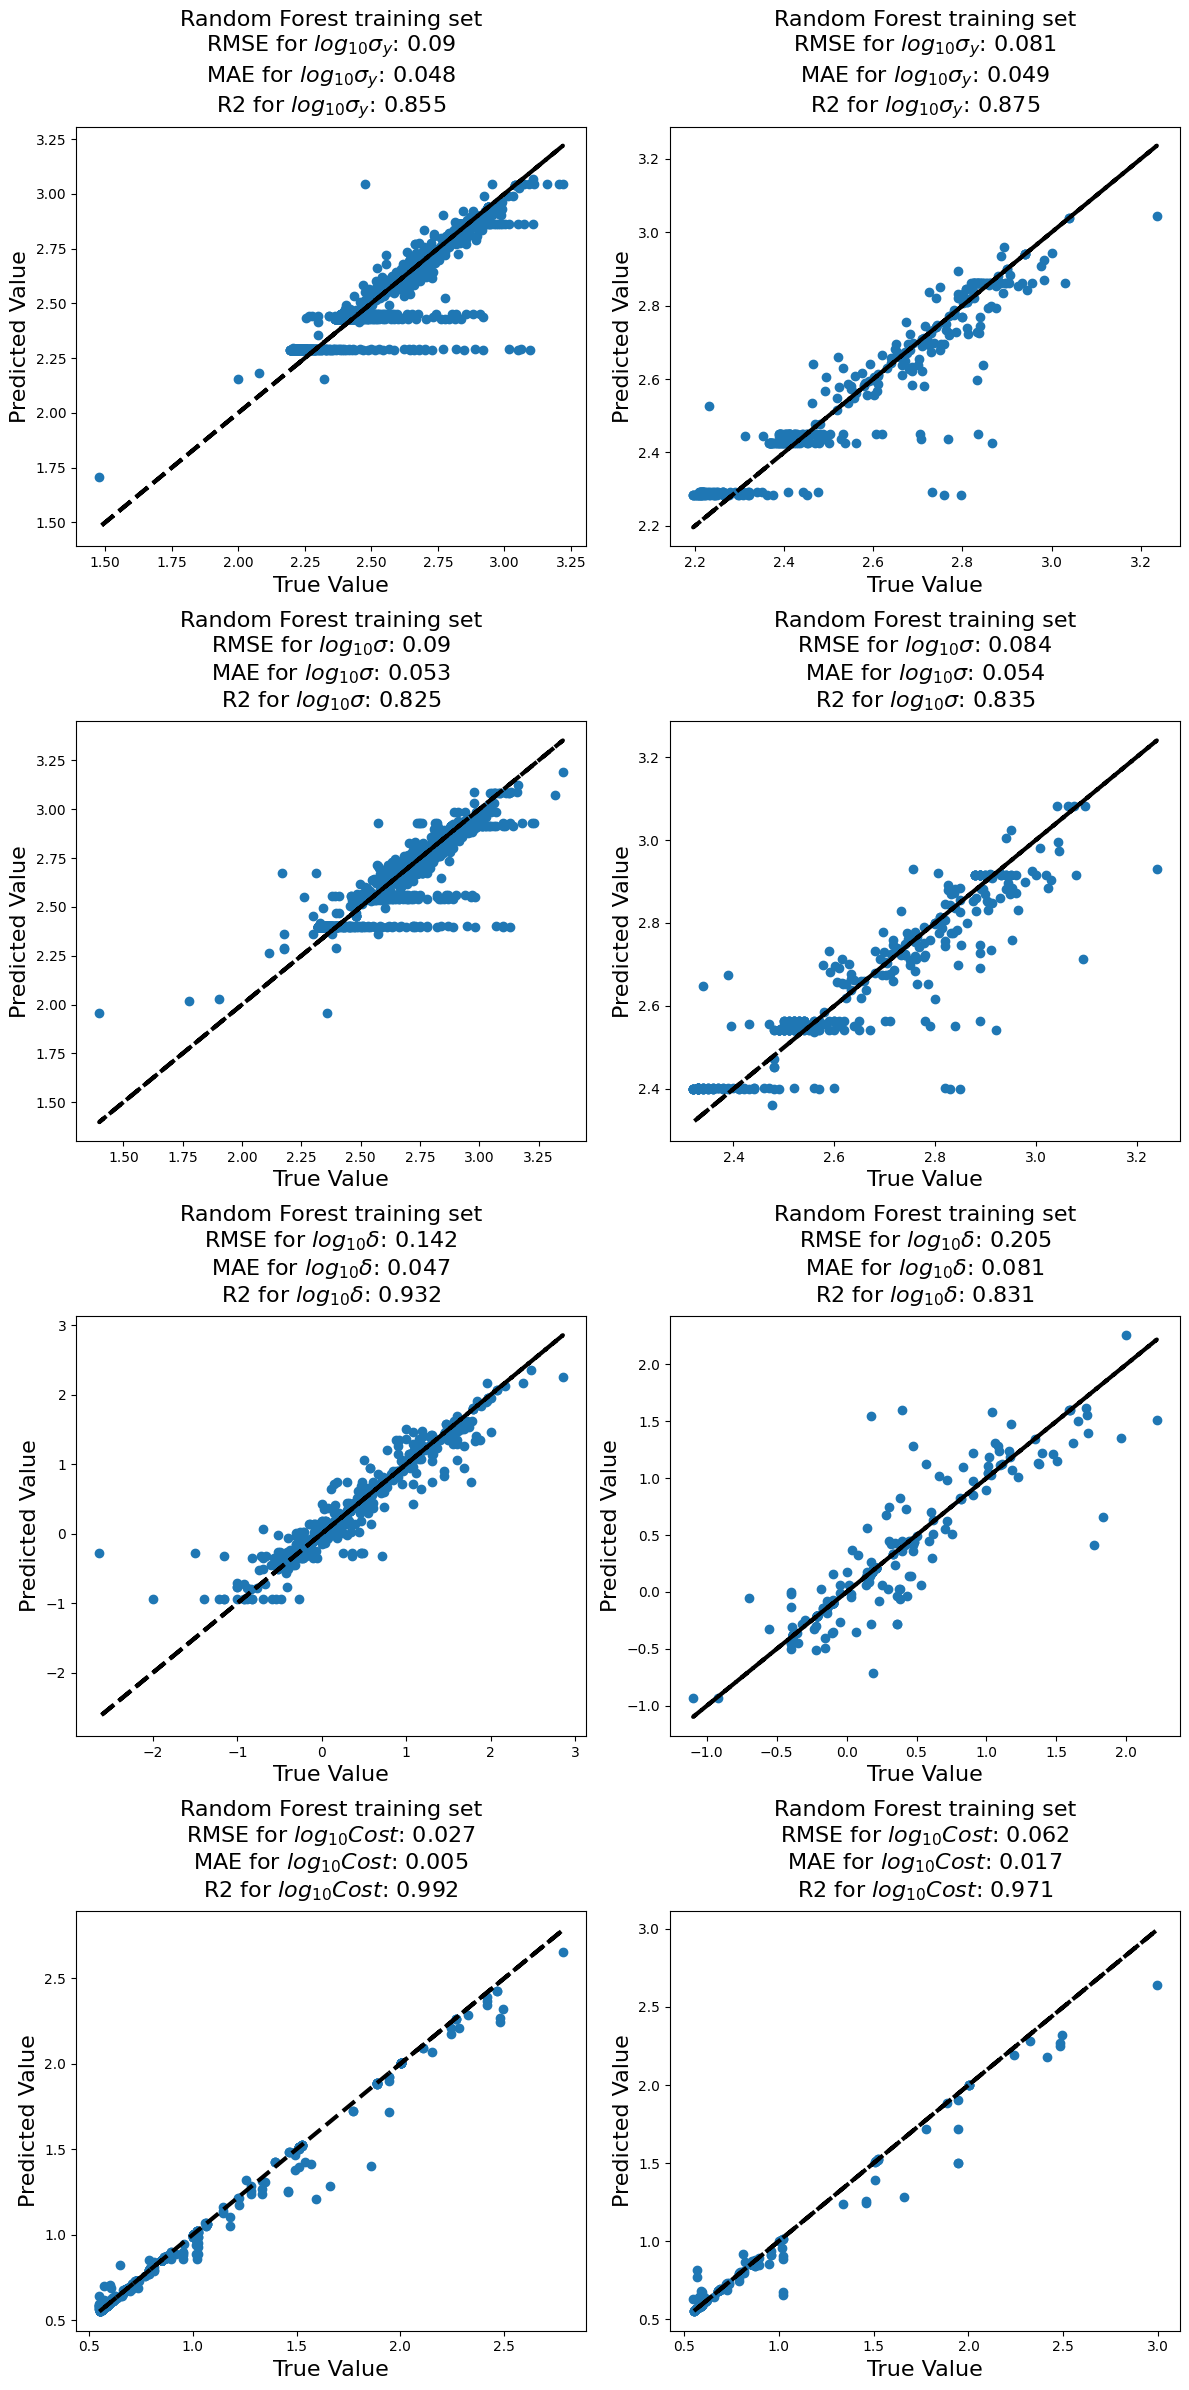

In [25]:
# Random Forest Regression
rfregressor = RandomForestRegressor(n_estimators=496, max_depth=26, random_state=0)

rfregressor.fit(X_train,y_train)
y_pred_train = rfregressor.predict(X_train)
y_pred_test = rfregressor.predict(X_test)

rmse, mae, R2 = plot('Random Forest', y_train, y_pred_train, y_test, y_pred_test)

rmse_scores['Random Forest'] = rmse
mae_scores['Random Forest'] = mae
R2_scores['Random Forest'] = R2

In [26]:
# Get SHAP values
rfexplainer = shap.TreeExplainer(rfregressor)
rf_shap_values = rfexplainer(X_train)
np.shape(rf_shap_values.values)

(1549, 21, 4)

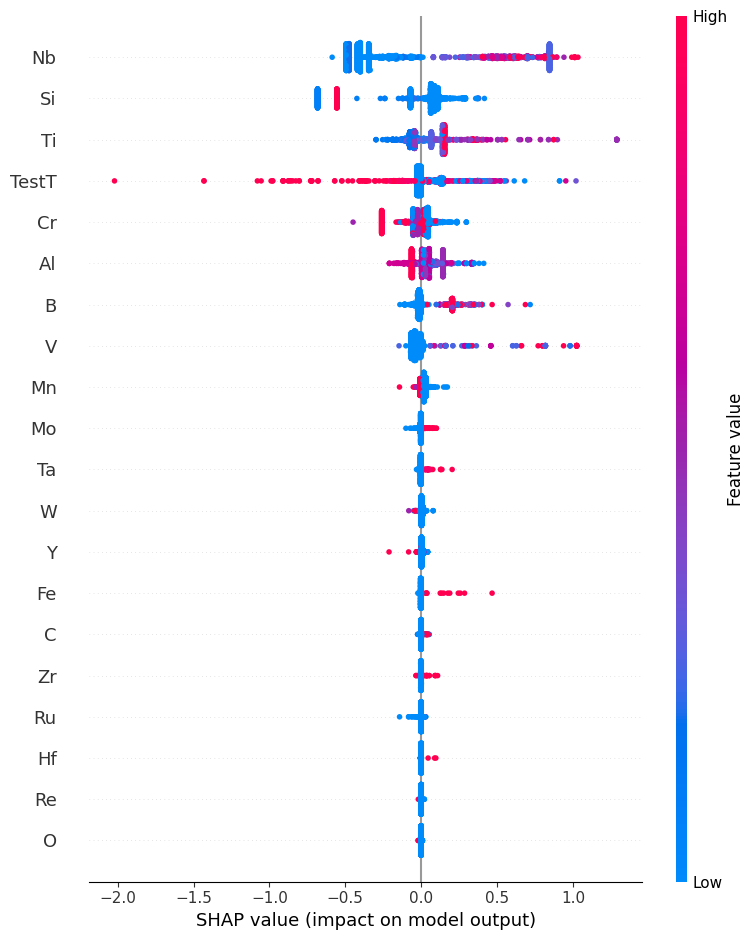

In [27]:
# Summary plot for logYS
shap.summary_plot(rf_shap_values[:,:,0])

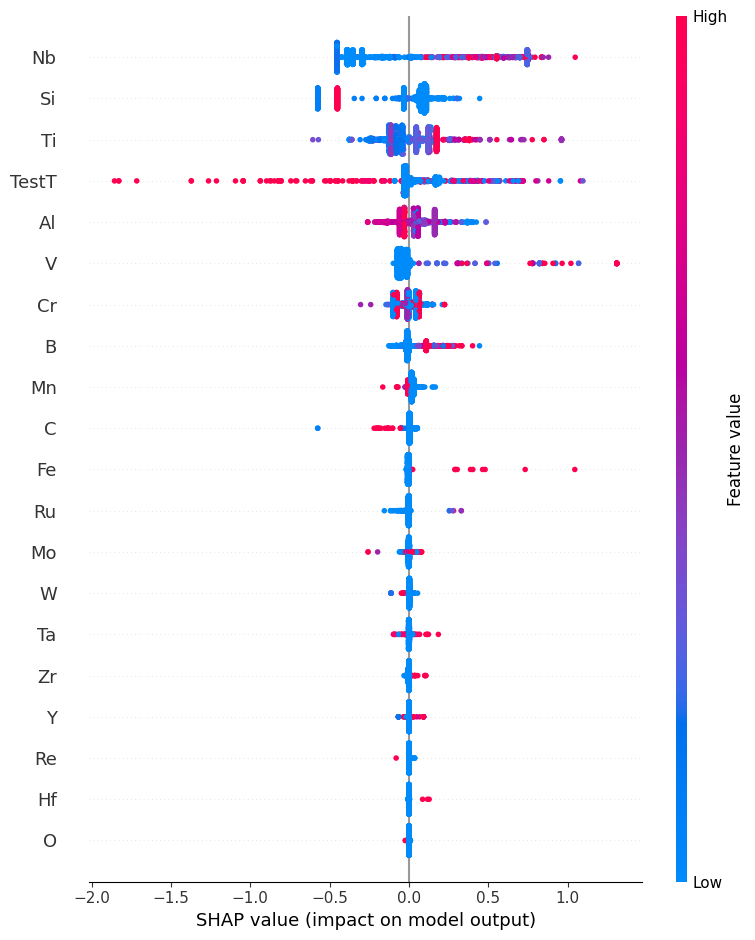

In [28]:
# Summary plot for logTS
shap.summary_plot(rf_shap_values[:,:,1])

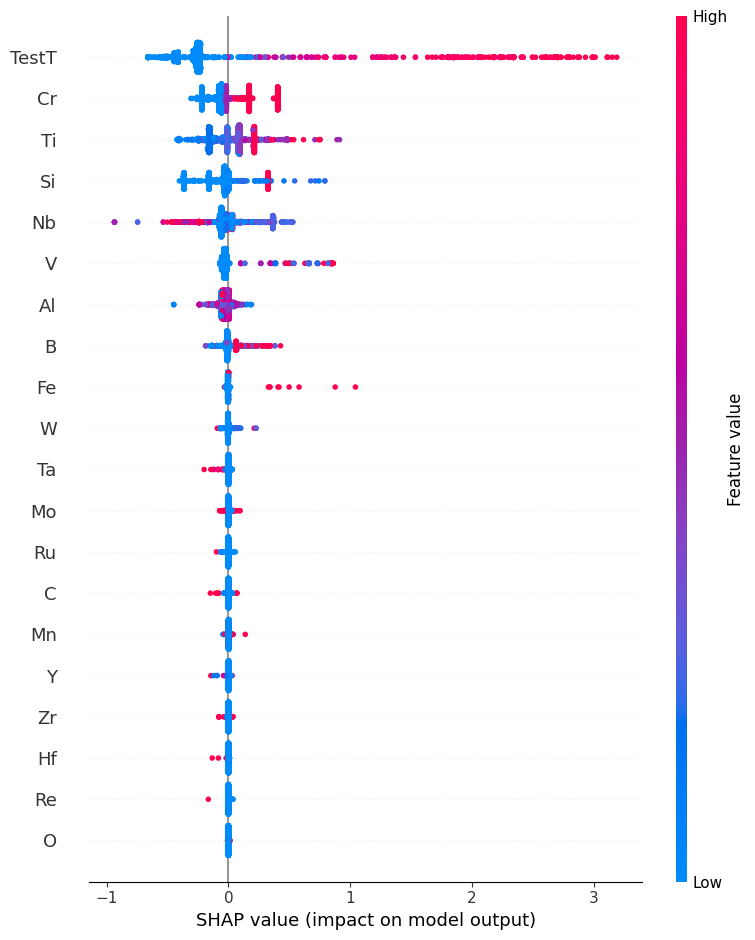

In [29]:
# Summary plot for logEl
shap.summary_plot(rf_shap_values[:,:,2])

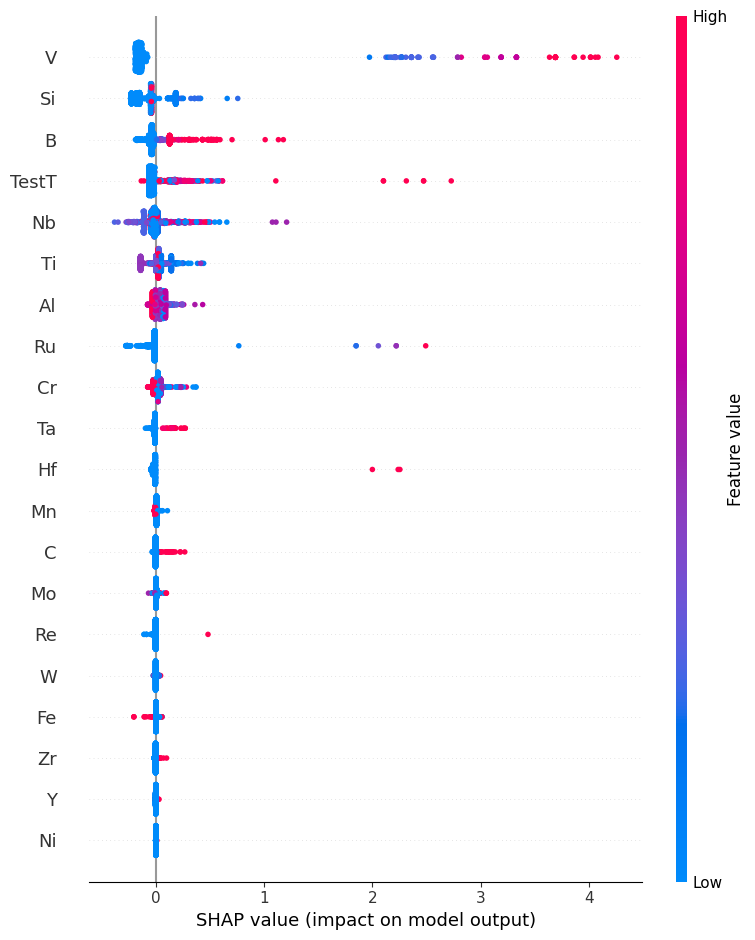

In [30]:
# Summary plot for logCost
shap.summary_plot(rf_shap_values[:,:,3])

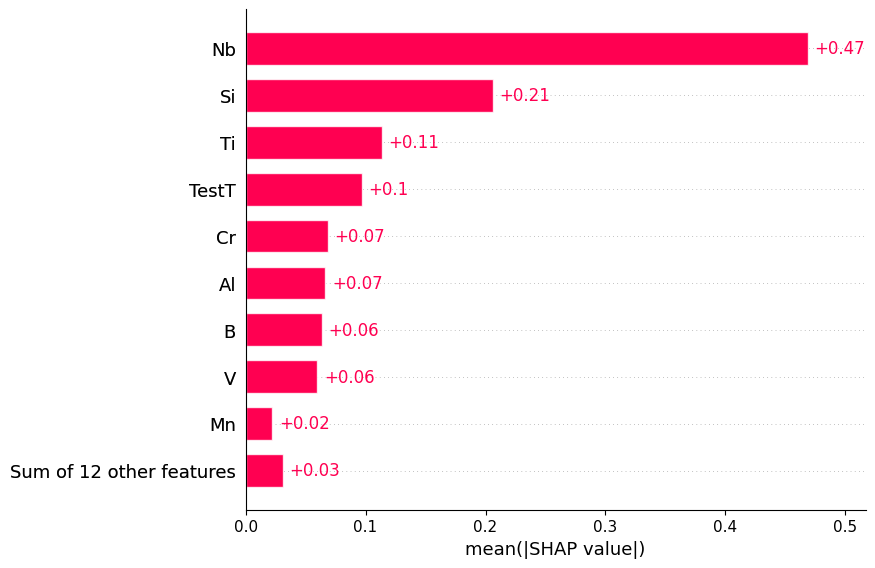

In [39]:
# Mean SHAP for logYS
shap.plots.bar(rf_shap_values[:,:,0])

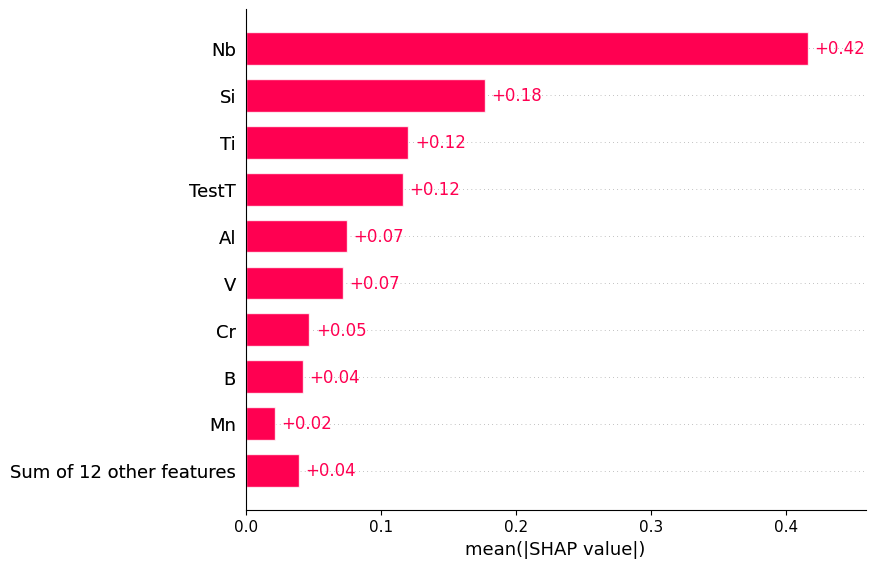

In [40]:
# Mean SHAP for logTS
shap.plots.bar(rf_shap_values[:,:,1])

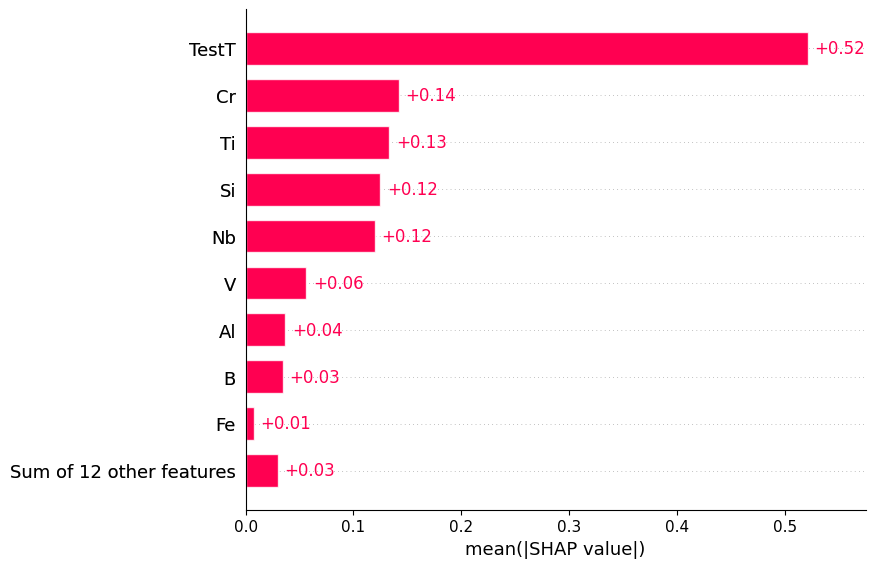

In [41]:
# Mean SHAP for logEl
shap.plots.bar(rf_shap_values[:,:,2])

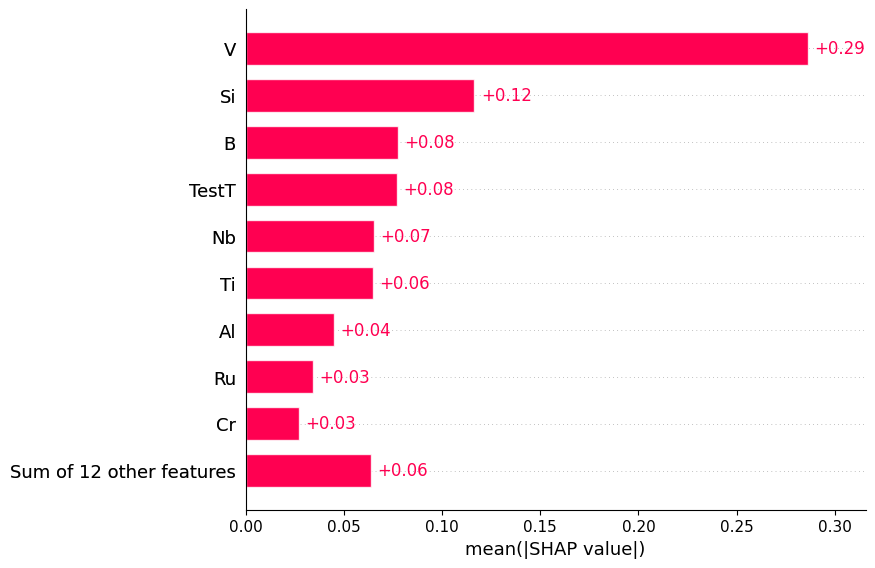

In [42]:
# Mean SHAP for logCost
shap.plots.bar(rf_shap_values[:,:,3])

In [ ]:
0

### Bayesian Optimization

In [14]:
# Define our search space
x_space = [Real(0.01,100),Real(0.01,100),Integer(0,0.1),Real(0.01,10),Real(0.01,10)]
for i in range(5,20):
    x_space.append(Integer(0,0.1))
x_space.append(Integer(973,973.1))
x_space

[Real(low=0.01, high=100, prior='uniform', transform='identity'),
 Real(low=0.01, high=100, prior='uniform', transform='identity'),
 Integer(low=0, high=0.1, prior='uniform', transform='identity'),
 Real(low=0.01, high=10, prior='uniform', transform='identity'),
 Real(low=0.01, high=10, prior='uniform', transform='identity'),
 Integer(low=0, high=0.1, prior='uniform', transform='identity'),
 Integer(low=0, high=0.1, prior='uniform', transform='identity'),
 Integer(low=0, high=0.1, prior='uniform', transform='identity'),
 Integer(low=0, high=0.1, prior='uniform', transform='identity'),
 Integer(low=0, high=0.1, prior='uniform', transform='identity'),
 Integer(low=0, high=0.1, prior='uniform', transform='identity'),
 Integer(low=0, high=0.1, prior='uniform', transform='identity'),
 Integer(low=0, high=0.1, prior='uniform', transform='identity'),
 Integer(low=0, high=0.1, prior='uniform', transform='identity'),
 Integer(low=0, high=0.1, prior='uniform', transform='identity'),
 Integer(low

In [15]:
def f(X):
    x_init = np.array(X).reshape(1,-1)
    comp = x_init[:-1]/sum(x_init[:-1])*100
    x = np.append(comp,x_init[-1]).reshape(1,-1)
    transformed = scalerX.transform(x)
    y_pred = rfregressor.predict(transformed)
    predicted = scalerY.inverse_transform(y_pred)
    
    target_err_1 = 0
    for i in range(len(target)):
        if target[i] != None:
            target_err_1 = target_err_1 + weight[i]*abs(target[i] - predicted[0][i])
    
    objective = target_err_1
    
    return objective

In [16]:
#Targets
targets = [[np.log10(421),np.log10(600),np.log10(5.2),None],
           [np.log10(421),np.log10(600),np.log10(5.2),np.log10(3.87)]]

In [17]:
targets_df = pd.DataFrame(targets)
targets_df.to_excel("MPR_RF_BO_Targets-1-700C_TiAl2Cr2Nb.xlsx")

In [18]:
weight = [1, 1, 1, 1, 1, 1, 1]

In [19]:
fl_nm=['woCostmod','wCostmod-1']
for i in range(len(targets)-2):
    fl_nm.append('wCostmod'+'-'+str(i+2))
fl_nm

['woCostmod', 'wCostmod-1']

In [20]:
for i in range(len(targets)):
    target = targets[i]
    res = gp_minimize(f,                  # the function to minimize
                      x_space,      # the bounds on each dimension of x
                      acq_func="EI",      # the acquisition function
                      n_calls=200,         # the number of evaluations of f
                      n_random_starts=5,  # the number of random initialization points
                      random_state=42,   # the random seed
                      xi=0.01,           # Exploration or Exploitation
                      n_jobs=-1)
    
    for j in range(200):
        results = res.x_iters[j]
        comp_res = np.round(results[:-1]/sum(results[:-1])*100,2)
        results_mod = np.append(comp_res,results[-1])
        temp1 = pd.DataFrame(results_mod.reshape(1,-1), columns=features, index=[j])
        transformed = scalerX.transform(temp1)
        y_pred = rfregressor.predict(transformed)
        predicted = scalerY.inverse_transform(y_pred)
        temp2 = pd.DataFrame(predicted, columns=response, index=[j])
        temp3 = pd.DataFrame(np.round(res.func_vals[j],2), columns = ['Objective'], index=[j])
        if j==0:
            temp_db = pd.concat([temp1,temp2,temp3],axis=1)
        else:
            temp4 = pd.concat([temp1,temp2,temp3],axis=1)
            temp_db = pd.concat([temp_db,temp4],axis=0)
    
    temp_db = temp_db.sort_values('Objective')
    res_df = temp_db.iloc[:10,:]
    temp_db.to_excel('MPR_RF_BO_Target-1-700C_TiAl2Cr2Nb_'+fl_nm[i]+'.xlsx')
    res_df.to_excel('MPR_RF_BO_Target-1-700C_TiAl2Cr2Nb_'+fl_nm[i]+'_top10.xlsx')

c:\Users\shakt\anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\shakt\anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\shakt\anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\shakt\anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\shakt\anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


## MPR DNN model and BO

### Running 1st time

In [29]:
# Importing libraries for Neural Network Regression
import tensorflow as tf
from tensorflow import keras
import keras_tuner as kt
from keras import Sequential
from keras.layers import InputLayer, Dense, BatchNormalization

In [53]:
# Storing the hyperparameters in variable to develop the NN architecture
num_dense_layers = 11
units = 1029
activation = 'relu'
learning_rate = 4.161731258030334e-05
optimizer = 'Adam'
batchsize = 78
epochs = 100

In [54]:
# function to develop NN architecture with same number of units in all hidden layers
def build_and_compile_model(num_dense_layers,units,activation,lr,optimizer):
    model = keras.Sequential()
    model.add(InputLayer(input_shape=(X_train.shape[1],))) #Input Layer with training feature data shape
    for i in range(num_dense_layers):
        name = 'layer_dense_{0}'.format(i+1) #name of hidden layer
        model.add(Dense(units,activation=activation,name=name)) #add hidden layer(s)
    model.add(Dense(y_train.shape[1], activation='linear')) #final layer before output layer
    if optimizer == 'Adam':
        opt = keras.optimizers.Adam(learning_rate=lr)
    if optimizer == 'SGD':
        opt = keras.optimizers.SGD(learning_rate=lr)
    if optimizer == 'RMSprop':
        opt = keras.optimizers.RMSprop(learning_rate=lr)
    model.compile(loss='mean_absolute_error', optimizer=opt, metrics=['mean_squared_error'])
    return model

In [55]:
# Create the neural network with these hyper-parameters.
model1 = build_and_compile_model(num_dense_layers, units, activation, learning_rate, optimizer)
    
# Train the model.
history = model1.fit(X_train, y_train, epochs=epochs, batch_size=batchsize, validation_split=0.2, verbose=0)

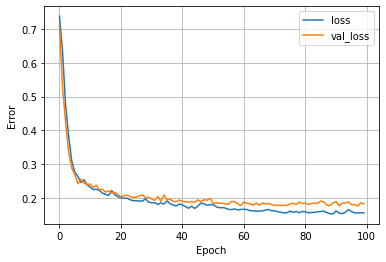

In [56]:
#function to plot the training and validation history of the NN
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.xlabel('Epoch')
    plt.ylabel('Error')
    plt.legend()
    plt.grid(True)

plot_loss(history)

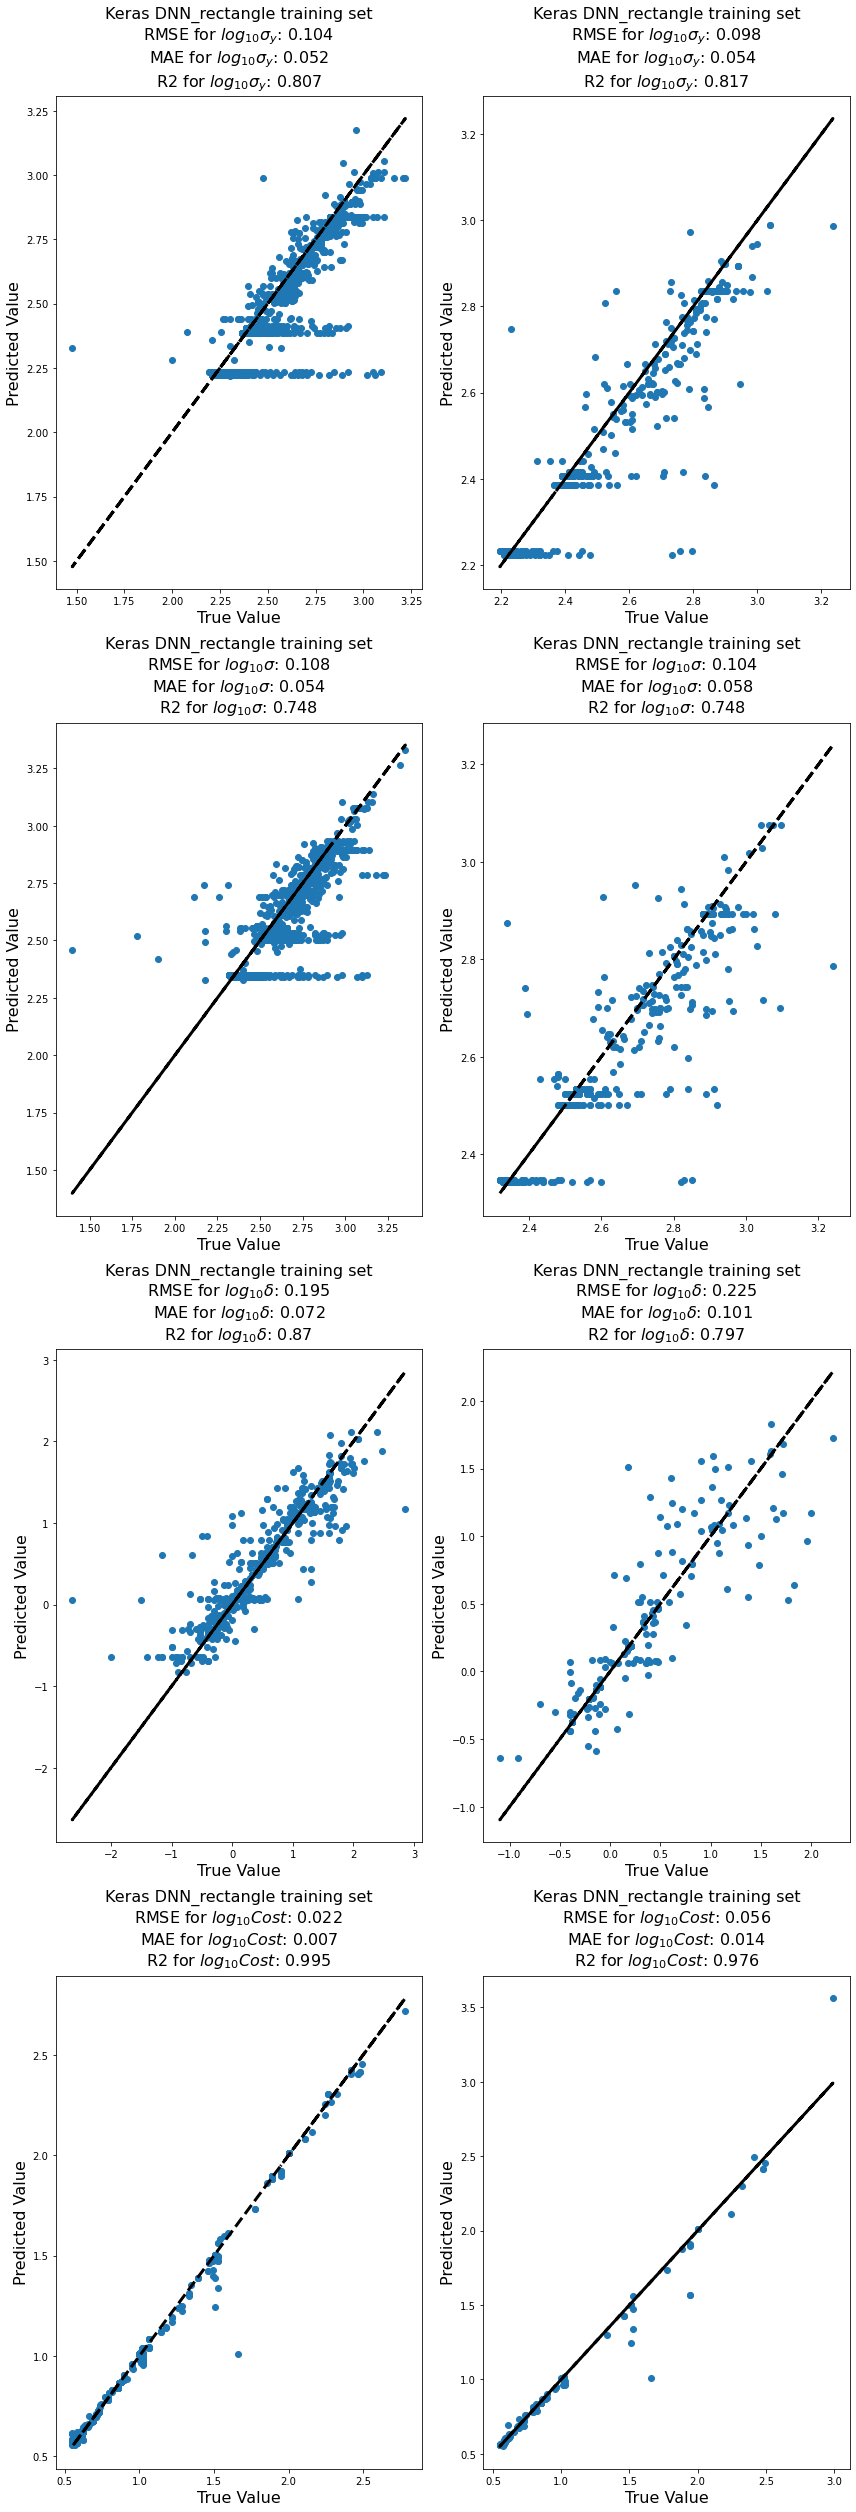

In [57]:
# Use the trained Keras model to predict on the training and test sets
y_pred_train=model1.predict(X_train)
y_pred_test=model1.predict(X_test)

# Plot the training results
rmse, mae, R2 = plot('Keras DNN_rectangle', y_train, y_pred_train, y_test, y_pred_test)

rmse_scores['Keras DNN_rectangle'] = rmse
mae_scores['Keras DNN_rectangle'] = mae
R2_scores['Keras DNN_rectangle'] = R2

In [58]:
model1.save('MPR DNNrect model')

INFO:tensorflow:Assets written to: MPR DNNrect model\assets


### Loading the saved model

In [50]:
import tensorflow as tf

In [51]:
dnn_rect_model = tf.keras.models.load_model("MPR DNNrect model")
dnn_rect_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer_dense_1 (Dense)       (None, 1029)              22638     
                                                                 
 layer_dense_2 (Dense)       (None, 1029)              1059870   
                                                                 
 layer_dense_3 (Dense)       (None, 1029)              1059870   
                                                                 
 layer_dense_4 (Dense)       (None, 1029)              1059870   
                                                                 
 layer_dense_5 (Dense)       (None, 1029)              1059870   
                                                                 
 layer_dense_6 (Dense)       (None, 1029)              1059870   
                                                                 
 layer_dense_7 (Dense)       (None, 1029)             

13/13 [==============================] - 0s 3ms/step


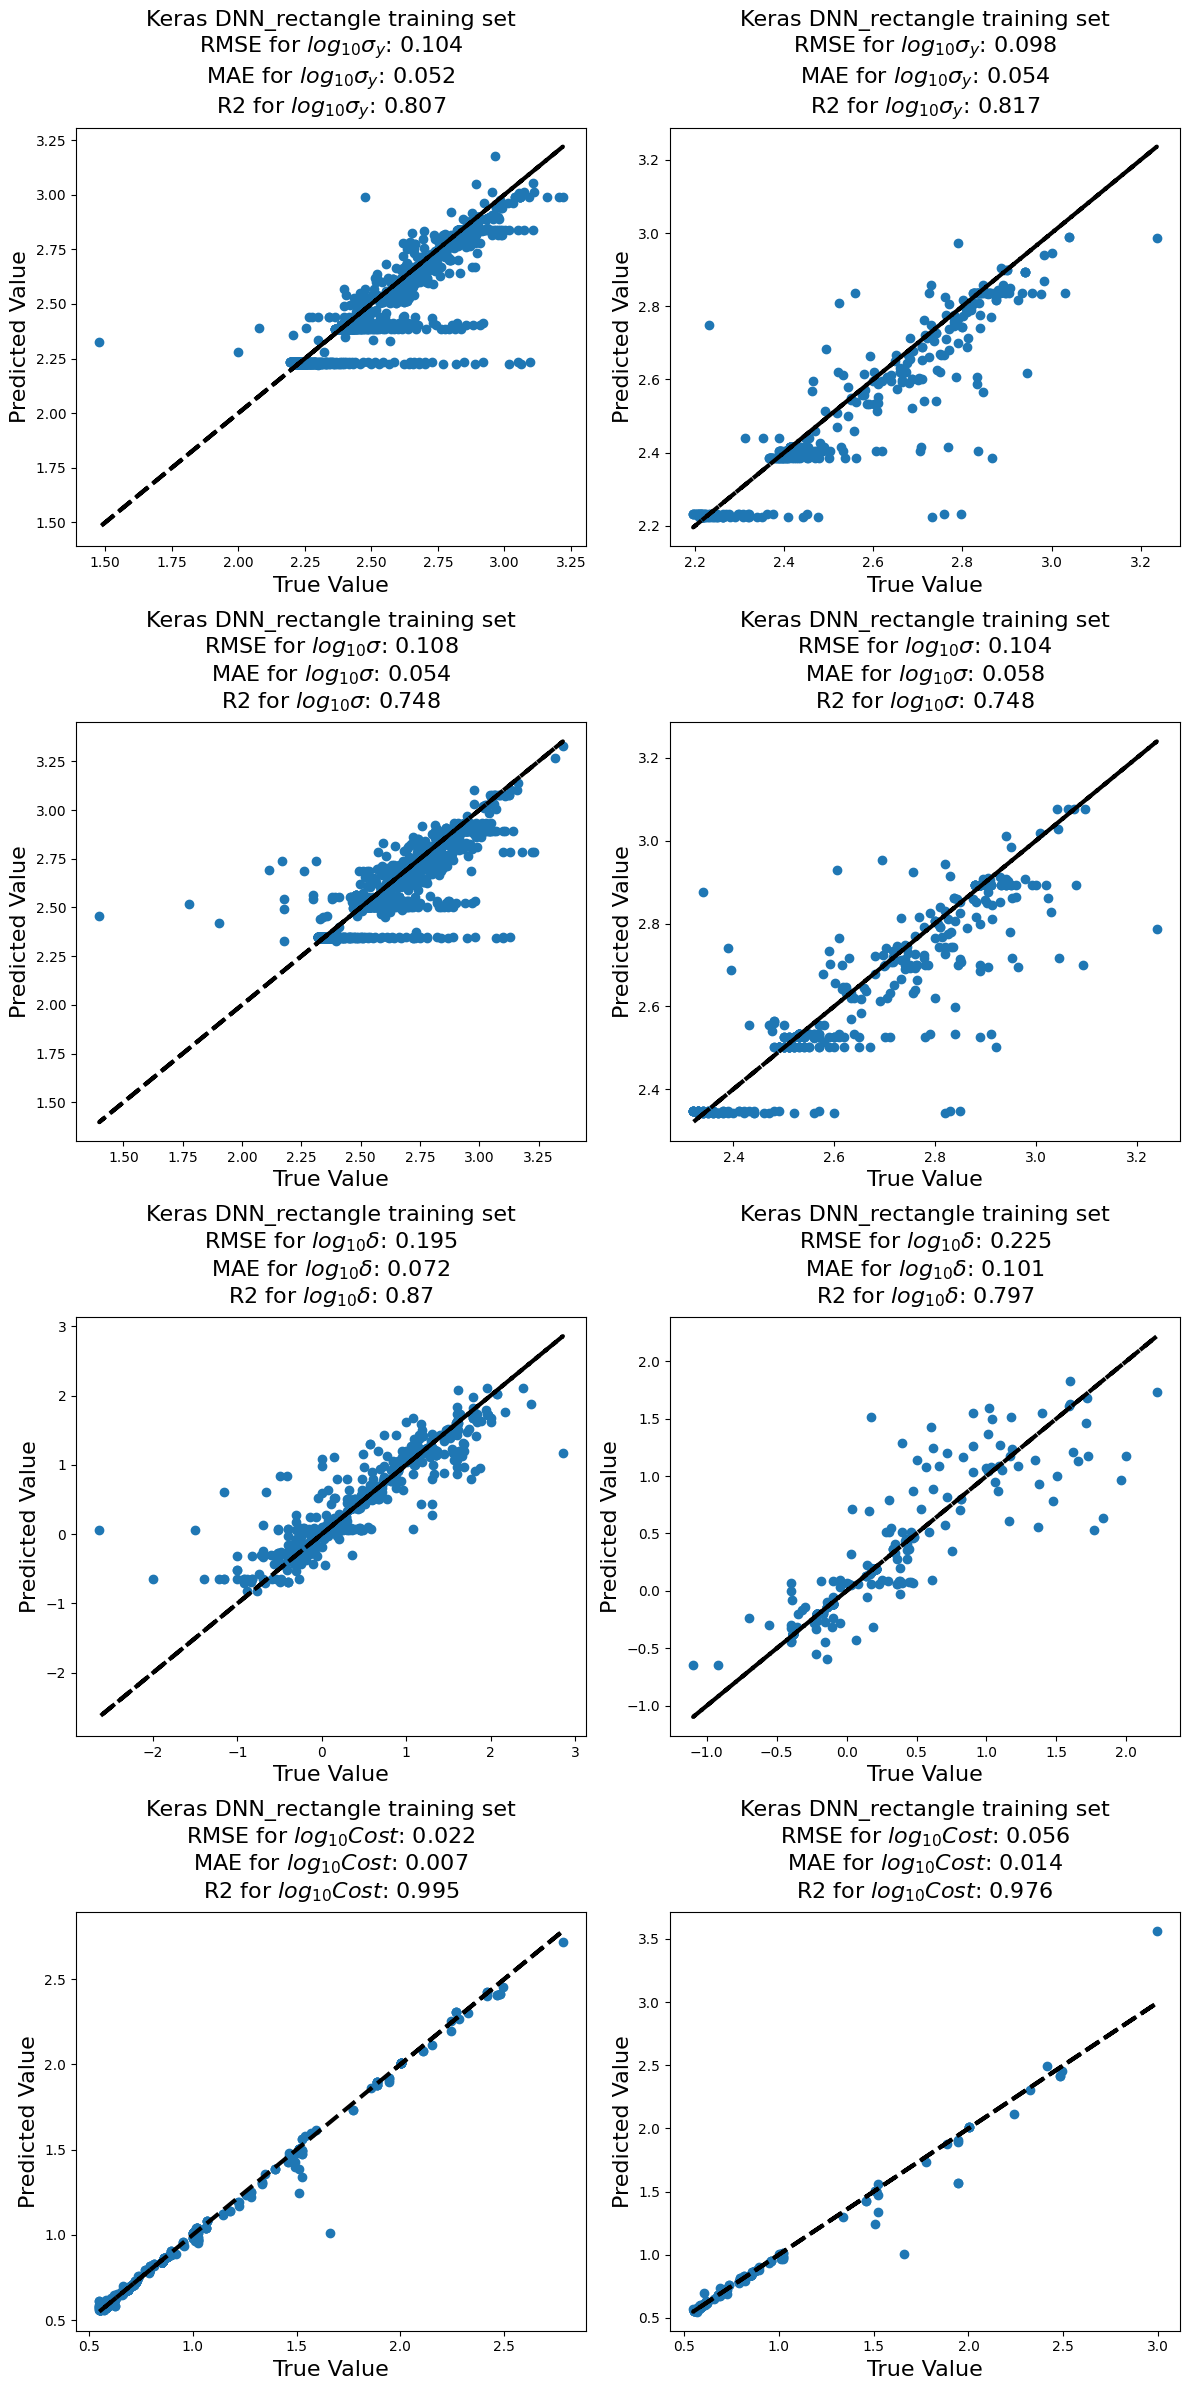

In [52]:
# Use the saved Keras model to predict on the training and test sets
y_pred_train=dnn_rect_model.predict(X_train)
y_pred_test=dnn_rect_model.predict(X_test)

# Plot the training results
rmse, mae, R2 = plot('Keras DNN_rectangle', y_train, y_pred_train, y_test, y_pred_test)

rmse_scores['Keras DNN_rectangle'] = rmse
mae_scores['Keras DNN_rectangle'] = mae
R2_scores['Keras DNN_rectangle'] = R2

In [59]:
# Get SHAP values
dnnexplainer = shap.KernelExplainer(dnn_rect_model.predict, X_train.iloc[:100,:])
dnn_shap_values = dnnexplainer.shap_values(X_train.iloc[:100,:])
np.shape(dnn_shap_values)

4/4 [==============================] - 0s 11ms/step


  0%|          | 0/100 [00:00<?, ?it/s]

6507/6507 [==============================] - 18s 3ms/step


(4, 100, 21)

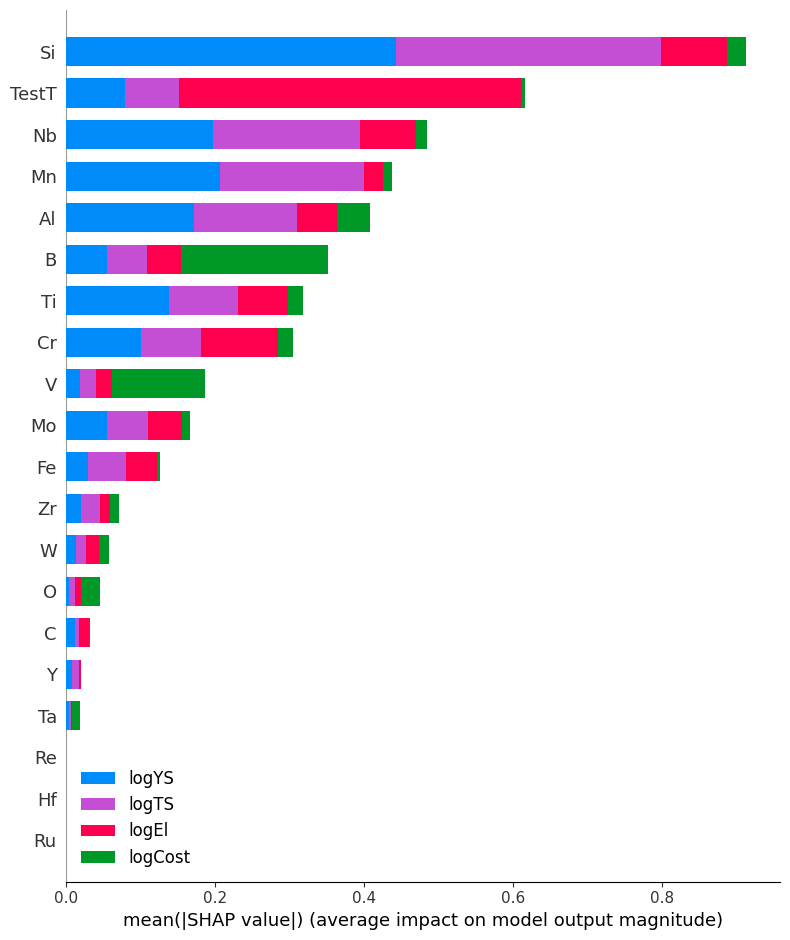

In [69]:
# Summary plot for logYS
shap.summary_plot(dnn_shap_values, features=X_train.iloc[:100,:], class_names=response)

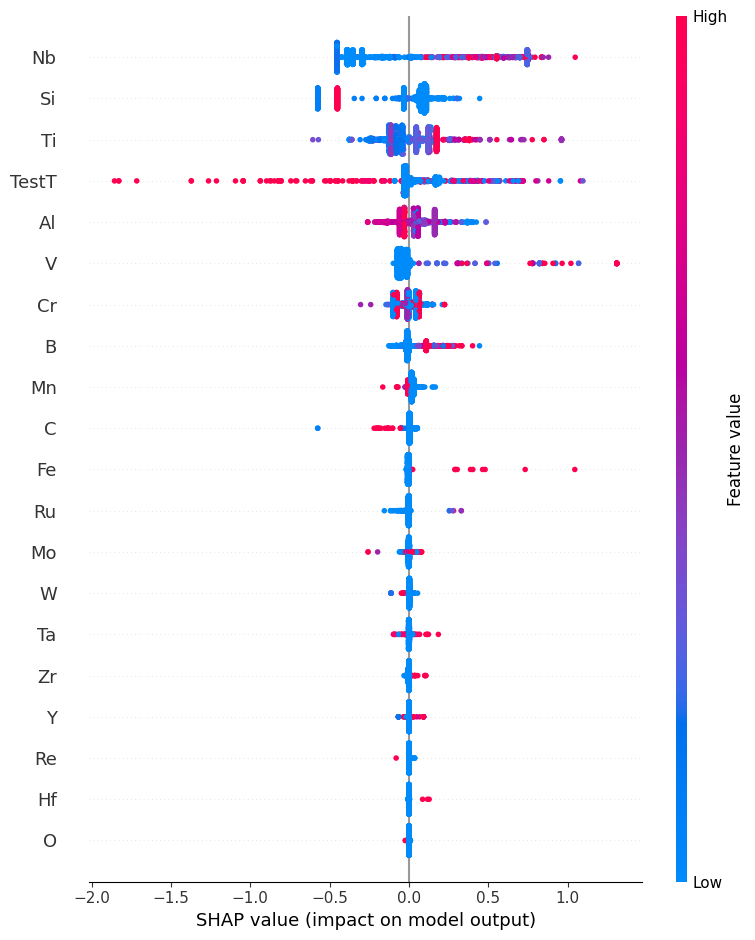

In [ ]:
# Summary plot for logTS
shap.summary_plot(rf_shap_values[:,:,1])

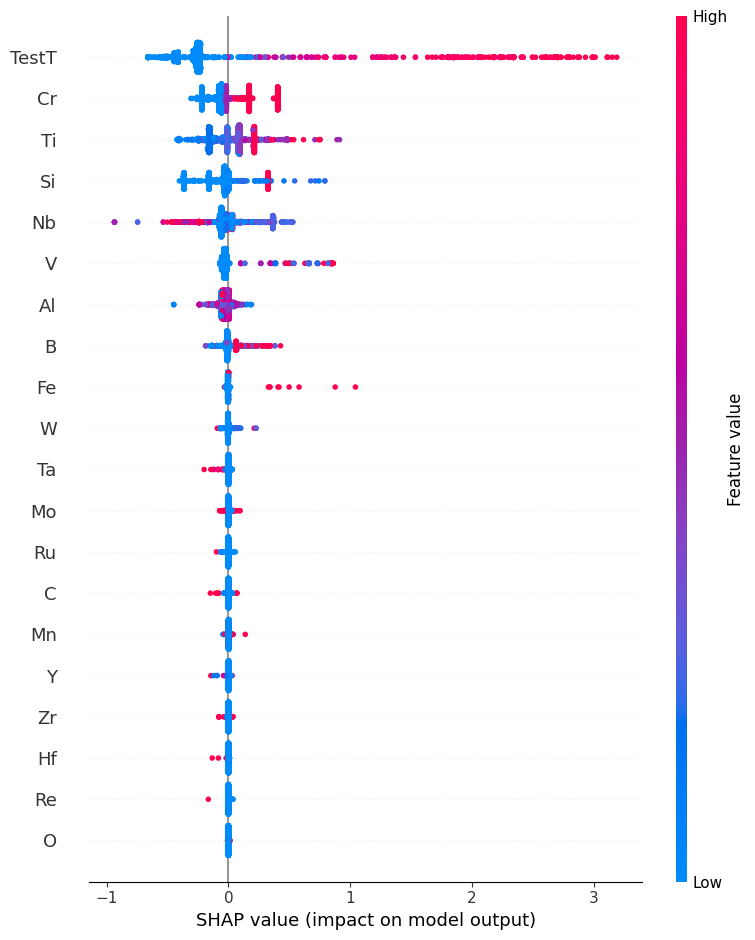

In [ ]:
# Summary plot for logEl
shap.summary_plot(rf_shap_values[:,:,2])

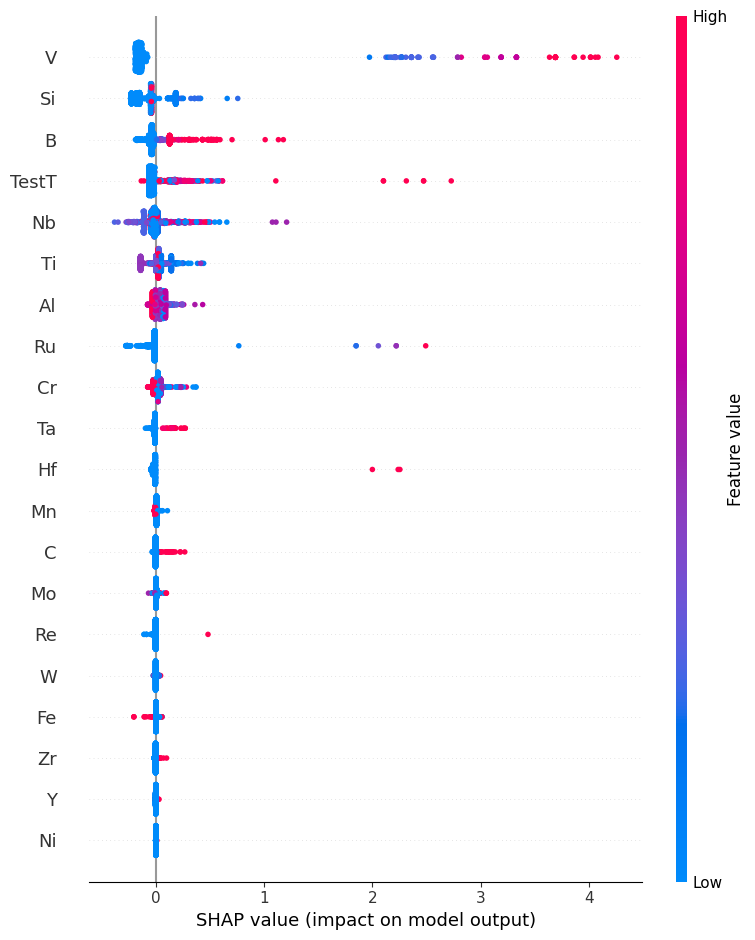

In [ ]:
# Summary plot for logCost
shap.summary_plot(rf_shap_values[:,:,3])

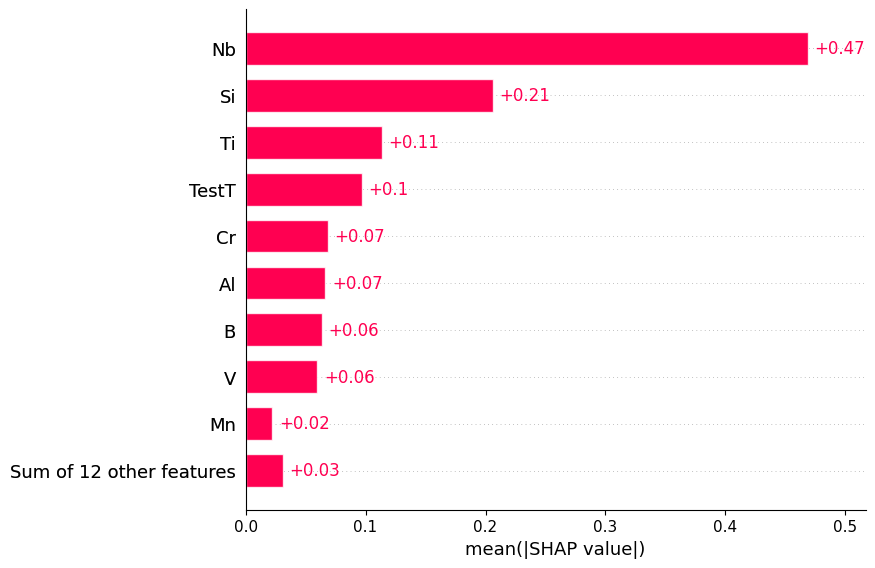

In [ ]:
# Mean SHAP for logYS
shap.plots.bar(rf_shap_values[:,:,0])

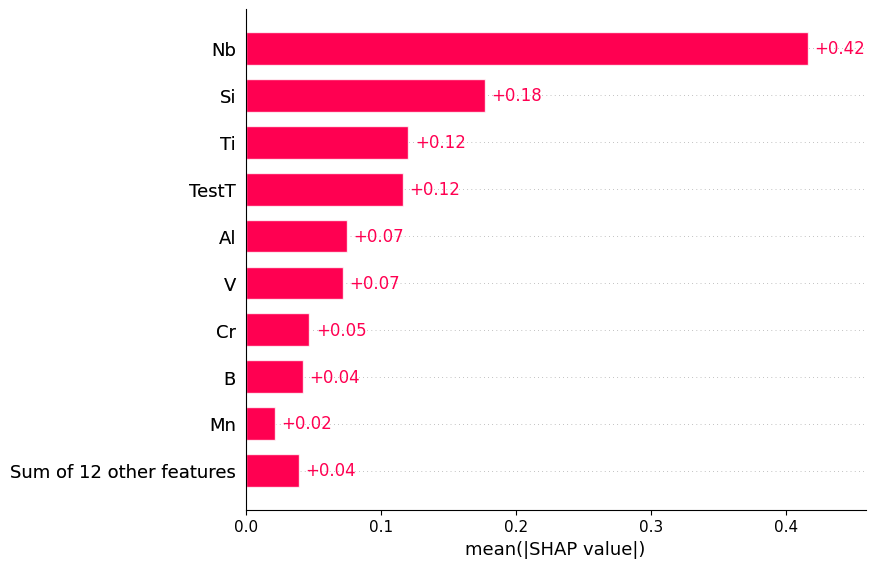

In [ ]:
# Mean SHAP for logTS
shap.plots.bar(rf_shap_values[:,:,1])

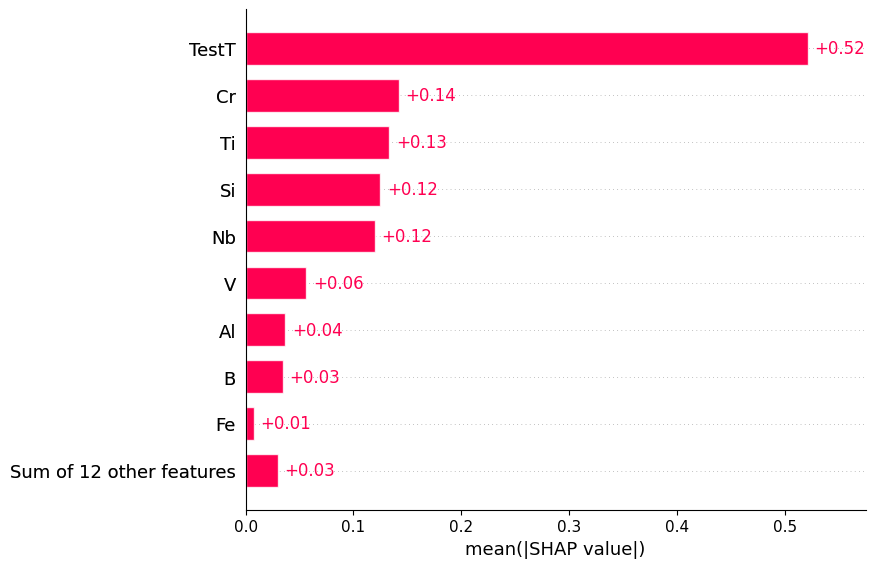

In [ ]:
# Mean SHAP for logEl
shap.plots.bar(rf_shap_values[:,:,2])

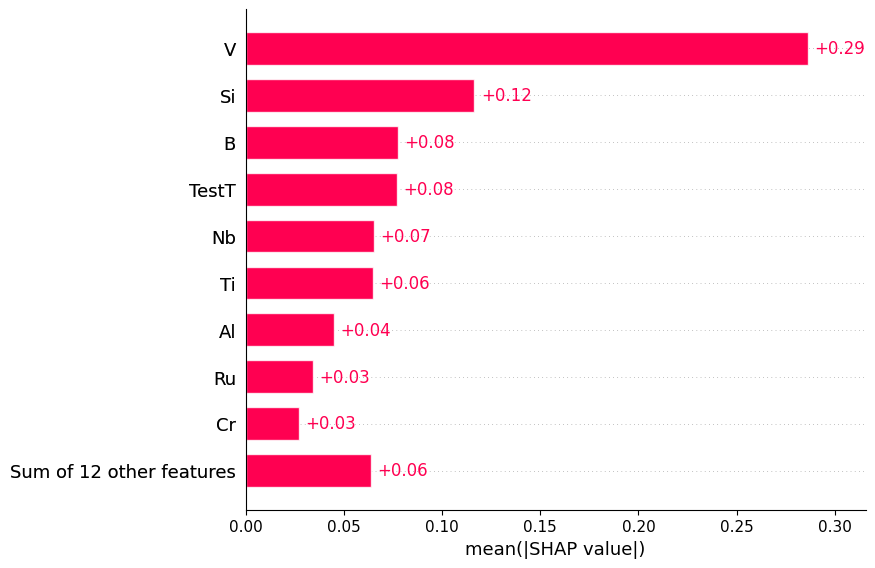

In [ ]:
# Mean SHAP for logCost
shap.plots.bar(rf_shap_values[:,:,3])

### Bayesian Optimization

In [24]:
# Define our search space
x_space = [Real(0.01,100),Real(0.01,100),Integer(0,0.1),Real(0.01,10),Real(0.01,10)]
for i in range(5,20):
    x_space.append(Integer(0,0.1))
x_space.append(Integer(973,973.1))
x_space

[Real(low=0.01, high=100, prior='uniform', transform='identity'),
 Real(low=0.01, high=100, prior='uniform', transform='identity'),
 Integer(low=0, high=0.1, prior='uniform', transform='identity'),
 Real(low=0.01, high=10, prior='uniform', transform='identity'),
 Real(low=0.01, high=10, prior='uniform', transform='identity'),
 Integer(low=0, high=0.1, prior='uniform', transform='identity'),
 Integer(low=0, high=0.1, prior='uniform', transform='identity'),
 Integer(low=0, high=0.1, prior='uniform', transform='identity'),
 Integer(low=0, high=0.1, prior='uniform', transform='identity'),
 Integer(low=0, high=0.1, prior='uniform', transform='identity'),
 Integer(low=0, high=0.1, prior='uniform', transform='identity'),
 Integer(low=0, high=0.1, prior='uniform', transform='identity'),
 Integer(low=0, high=0.1, prior='uniform', transform='identity'),
 Integer(low=0, high=0.1, prior='uniform', transform='identity'),
 Integer(low=0, high=0.1, prior='uniform', transform='identity'),
 Integer(low

In [25]:
def f(X):
    x_init = np.array(X).reshape(1,-1)
    comp = x_init[:-1]/sum(x_init[:-1])*100
    x = np.append(comp,x_init[-1]).reshape(1,-1)
    transformed = scalerX.transform(x)
    y_pred = dnn_rect_model.predict(transformed)
    predicted = scalerY.inverse_transform(y_pred)
    
    target_err_1 = 0
    for i in range(len(target)):
        if target[i] != None:
            target_err_1 = target_err_1 + weight[i]*abs(target[i] - predicted[0][i])
    
    objective = target_err_1
    
    return objective

In [26]:
#Targets
targets = [[np.log10(421),np.log10(600),np.log10(5.2),None],
           [np.log10(421),np.log10(600),np.log10(5.2),np.log10(3.87)]]

In [27]:
targets_df = pd.DataFrame(targets)
targets_df.to_excel("MPR_DNNrect_BO_Targets-1-700C_TiAl2Cr2Nb.xlsx")

In [28]:
weight = [1, 1, 1, 1, 1, 1, 1]

In [29]:
fl_nm=['woCostmod','wCostmod-1']
for i in range(len(targets)-2):
    fl_nm.append('wCostmod'+'-'+str(i+2))
fl_nm

['woCostmod', 'wCostmod-1']

In [30]:
for i in range(len(targets)):
    target = targets[i]
    res = gp_minimize(f,                  # the function to minimize
                      x_space,      # the bounds on each dimension of x
                      acq_func="EI",      # the acquisition function
                      n_calls=200,         # the number of evaluations of f
                      n_random_starts=5,  # the number of random initialization points
                      random_state=42,   # the random seed
                      xi=0.001,           # Exploration or Exploitation
                      n_jobs=-1)
    
    for j in range(200):
        results = res.x_iters[j]
        comp_res = np.round(results[:-1]/sum(results[:-1])*100,2)
        results_mod = np.append(comp_res,results[-1])
        temp1 = pd.DataFrame(results_mod.reshape(1,-1), columns=features, index=[j])
        transformed = scalerX.transform(temp1)
        y_pred = dnn_rect_model.predict(transformed)
        predicted = scalerY.inverse_transform(y_pred)
        temp2 = pd.DataFrame(predicted, columns=response, index=[j])
        temp3 = pd.DataFrame(np.round(res.func_vals[j],3), columns = ['Objective'], index=[j])
        if j==0:
            temp_db = pd.concat([temp1,temp2,temp3],axis=1)
        else:
            temp4 = pd.concat([temp1,temp2,temp3],axis=1)
            temp_db = pd.concat([temp_db,temp4],axis=0)
    
    temp_db = temp_db.sort_values('Objective')
    res_df = temp_db.iloc[:10,:]
    temp_db.to_excel('MPR_DNNrect_BO_Target-1-700C_TiAl2Cr2Nb_'+fl_nm[i]+'.xlsx')
    res_df.to_excel('MPR_DNNrect_BO_Target-1-700C_TiAl2Cr2Nb_'+fl_nm[i]+'_top10.xlsx')

c:\Users\shakt\anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\shakt\anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\shakt\anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\shakt\anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\shakt\anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
